<h1 style="text-align: center">Maratona Behind The Code</h1>
<h2 style="text-align: center">Final Challenge -  Machine Learning applied to Planet Exploration</h2>

<hr>

## Short Description

Astronomy has always fascinated mankind. Until we can trace ancient civilizations had looked to the sky and found some patterns in the dynamics of the night sky and whether a celestial body can emit light or just reflect it. Using this simple approach, the Greeks, the Egyptians and the Babylonians had mapped the planets until saturn.

More than a thousand years had passed to the discovery of Uranus, and this was only possible grace of technological advance. And during the last three decades humanity has discovery more planets than ever and now it is time to put A.I to help astronomers to classify the celestials bodies that light and the gravitational disturb is meraly measerable. Are you up for the challenge ?

<hr>

## Installing Libs

In [ ]:
!pip install --upgrade ibm-cos-sdk==2.7.0

In [ ]:
!pip install --upgrade --force-reinstall ibm_watson_machine_learning

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

<!-- ## Aquisição do conjunto de dados -->
## Acquiring dataset

It is necessary to insert the dataset as a dataframe on jupyter notebook.

In [1]:
import pandas as pd

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/asperduti/maratonadev-la/26f45ebc90e211fdea6f24d22d239d890abe0ef0/desafio-9-2020/data/dataset/dataset.csv
df_data_1 = pd.read_csv(r'dataset.csv')
df_data_1.tail()

--2020-12-06 13:19:11--  https://raw.githubusercontent.com/asperduti/maratonadev-la/26f45ebc90e211fdea6f24d22d239d890abe0ef0/desafio-9-2020/data/dataset/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3605369 (3.4M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   3.44M  --.-KB/s    in 0.09s   

2020-12-06 13:19:11 (39.4 MB/s) - ‘dataset.csv’ saved [3605369/3605369]



,rowid,kepid,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,TARGET
7698,NaN,9114508.0,FALSE POSITIVE,NaN,1.0,0.0,0.0,0.0,256.456160,0.024750,-0.024750,141.75860,0.08440,NaN,779.0,NaN,-0.51,35.35,3.0,-3.00,17283.0,NaN,NaN,9.44,NaN,-0.89,175.0,0.22,0.05,-0.07,14.4,4.0,NaN,142.0,-156.0,4628.0,0.056,-16.000,646.0,NaN,-61.00,299.53513,45.441860,15745.0,1.0
7699,9457.0,9340460.0,FALSE POSITIVE,9.0,1.0,NaN,0.0,NaN,388.519605,0.007934,-0.007934,352.28980,0.01880,NaN,478.0,488.00,-272.00,10613.00,NaN,-0.51,151.2,11.8,-11.8,2.30,0.60,-0.91,350.0,3.56,2.86,-2.44,15.1,1.0,NaN,NaN,-238.0,3985.0,364.000,-0.130,1825.0,NaN,-719.00,291.07208,45.879307,11543.0,1.0
7700,9458.0,9409493.0,NaN,NaN,1.0,0.0,0.0,0.0,60.049737,0.005022,-0.005022,158.52260,NaN,-78.00000,1217.0,6859.00,-9.00,20.17,1.5,NaN,16650.0,NaN,-1156.0,28.92,2.10,-2.61,320.0,2.47,0.79,-0.70,17.5,1.0,4538.0,NaN,-159.0,4607.0,0.054,-0.027,663.0,48.00,-0.06,294.00723,45.953941,16675.0,1.0
7701,9459.0,NaN,CANDIDATE,502.0,NaN,0.0,NaN,0.0,5.887704,0.073470,-0.073470,135.03738,0.00971,-0.00971,185.0,266.00,-185.00,NaN,NaN,-0.33,39.7,4.9,NaN,0.60,0.19,-0.06,NaN,262.67,251.91,-75.21,9.3,1.0,NaN,163.0,NaN,4495.0,NaN,-221.000,947.0,0.31,-97.00,293.43494,NaN,13811.0,NaN
7702,9460.0,9649205.0,FALSE POSITIVE,12.0,1.0,0.0,0.0,0.0,237.266010,0.024400,-0.024400,315.94460,46.00000,-46.00000,34.0,0.41,-34.00,8.74,1.9,-1.90,150.4,21.7,-21.7,1.23,NaN,-0.17,299.0,NaN,1.20,NaN,NaN,1.0,5786.0,173.0,NaN,4402.0,NaN,-138.000,1007.0,207.00,-138.00,291.84842,NaN,NaN,1.0


We have some astronomical data on this dataset and it is important you know some of them:

- **TARGET**: The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE or CONFIRMED.
- **koi_pdisposition**: The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE and CANDIDATE.
- **koi_score**: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.

<hr>

## Challenge Details: Multiclass Classification

The proposal of the challenge is to classify data to enable machine to point if an amout of measures available on the dataset can be a planet, a candidate of planet that require more studies, or none which means it is not a planet. For this, we can use two approaches: supervised machine learning (classification) or unsupervised (clustering). In this challenge the classification will be applied, since a dataset is already available with "labels", or in other words, already with examples of data together with the target variable.

In the scikit-learn library we have several algorithms for classification. The participant is free to use the framework he wishes to complete this challenge. The role notebook is prepared for sckit-learn deployment though.

<hr>

## Data exploration

Use the cells below to explore the data, check which variables most influence the `TARGET` variable and the distribution of values.

In [2]:
df_training_dataset = df_data_1
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              6162 non-null   float64
 1   kepid              6162 non-null   float64
 2   koi_pdisposition   6162 non-null   object 
 3   koi_score          6162 non-null   float64
 4   koi_fpflag_nt      6162 non-null   float64
 5   koi_fpflag_ss      6162 non-null   float64
 6   koi_fpflag_co      6162 non-null   float64
 7   koi_fpflag_ec      6162 non-null   float64
 8   koi_period         6162 non-null   float64
 9   koi_period_err1    6162 non-null   float64
 10  koi_period_err2    6162 non-null   float64
 11  koi_time0bk        6162 non-null   float64
 12  koi_time0bk_err1   6162 non-null   float64
 13  koi_time0bk_err2   6162 non-null   float64
 14  koi_impact         6162 non-null   float64
 15  koi_impact_err1    6162 non-null   float64
 16  koi_impact_err2    6162 

In [3]:
df_training_dataset.nunique()

rowid                6162
kepid                5418
koi_pdisposition        2
koi_score             556
koi_fpflag_nt           2
koi_fpflag_ss           2
koi_fpflag_co           2
koi_fpflag_ec           2
koi_period           6162
koi_period_err1      5135
koi_period_err2      5114
koi_time0bk          6153
koi_time0bk_err1     2153
koi_time0bk_err2     2141
koi_impact           1325
koi_impact_err1      1079
koi_impact_err2       840
koi_duration         5504
koi_duration_err1    1971
koi_duration_err2    1978
koi_depth            5093
koi_depth_err1       1202
koi_depth_err2       1200
koi_prad             2332
koi_prad_err1        1459
koi_prad_err2        1274
koi_teq              2183
koi_insol            5667
koi_insol_err1       5296
koi_insol_err2       4972
koi_model_snr        2201
koi_tce_plnt_num        8
koi_steff            2063
koi_steff_err1        250
koi_steff_err2        341
koi_slogg            1298
koi_slogg_err1        434
koi_slogg_err2        285
koi_srad    

### Primer Limpieza, filas con TARGET nan

Este preprocesamiento de los datos, lo puedo realizar fuera del Pipeline, ya que solo estoy eliminando las filas con `TARGET` nulo, que no me sirven para alimentar el modelo.

In [4]:
df_training_dataset_2 = df_training_dataset[df_training_dataset['TARGET'].notnull()]
df_training_dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162 entries, 0 to 7702
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              4945 non-null   float64
 1   kepid              4925 non-null   float64
 2   koi_pdisposition   4912 non-null   object 
 3   koi_score          4946 non-null   float64
 4   koi_fpflag_nt      4920 non-null   float64
 5   koi_fpflag_ss      4918 non-null   float64
 6   koi_fpflag_co      4927 non-null   float64
 7   koi_fpflag_ec      4930 non-null   float64
 8   koi_period         4912 non-null   float64
 9   koi_period_err1    4934 non-null   float64
 10  koi_period_err2    4920 non-null   float64
 11  koi_time0bk        4911 non-null   float64
 12  koi_time0bk_err1   4939 non-null   float64
 13  koi_time0bk_err2   4946 non-null   float64
 14  koi_impact         4937 non-null   float64
 15  koi_impact_err1    4914 non-null   float64
 16  koi_impact_err2    4926 

## Pre-processing the dataset before training

### Construction of the complete Pipeline for WML encapsulation

#### Preparing custom transformations for loading on WML

To integrate these types of custom transformations into Watson Machine Learning Pipelines, you must first package your custom code as a Python library. This can be done easily using the *setuptools* tool.

On the following git repository: https://github.com/vnderlev/sklearn_transforms we have all the necessaries files to create a Python package, named **my_custom_sklearn_transforms**.
This package has the following file structure:

    /my_custom_sklearn_transforms.egg-info
        dependency_links.txt
        not-zip-safe
        PKG-INFO
        SOURCES.txt
        top_level.txt
    /my_custom_sklearn_transforms
        __init__.py
        sklearn_transformers.py
    PKG-INFO
    README.md
    setup.cfg
    setup.py
    
The main file, which will contain the code for our custom transforms, is the file **/my_custom_sklearn_transforms/sklearn_transformers.py**. If you access it in the repository, you will notice that it contains a class called `DropColumns()`, which has the necessary methods to remove columns from any dataset.

    - DropColumns() custom transformation code:
    
    from sklearn.base import BaseEstimator, TransformerMixin
    # All sklearn Transforms must have the `transform` and `fit` methods
    class DropColumns(BaseEstimator, TransformerMixin):
        def __init__(self, columns):
            self.columns = columns
        def fit(self, X, y=None):
            return self
        def transform(self, X):
            # Primeiro realizamos a cópia do dataframe 'X' de entrada
            data = X.copy()
            # Retornamos um novo dataframe sem as colunas indesejadas
            return data.drop(labels=self.columns, axis='columns')

If you have declared your own transformations (in addition to the provided DropColumn), you must add all the classes of those transformations created by you in this same file. To do this, you must fork this repository, and add your custom classes in the file **sklearn_transformers.py**.

If you only made use of the provided transformation (DropColumns), you can skip this fork step, and continue using the supplied base package! :)

After preparing your Python package with your custom transforms, replace the git repository link in the cell below and run it. If you have not prepared any new transforms, execute the cell with the repository link already provided.

<hr>
    
**PAY ATTENTION**

If the execution of the cell below returns an error that the repository already exists, run the foolowing command:

**!rm -r -f sklearn_transforms**

In [5]:
import numpy as np

In [6]:
# replace the link below with the link from your git repository (if applicable)
!git clone https://github.com/vnderlev/sklearn_transforms.git

Cloning into 'sklearn_transforms'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), done.


In [7]:
!cd sklearn_transforms
!ls -ltr

total 3532
drwxr-xr-x 1 root root    4096 Dec  2 22:04 sample_data
-rw-r--r-- 1 root root 3605369 Dec  6 13:19 dataset.csv
drwxr-xr-x 5 root root    4096 Dec  6 13:19 sklearn_transforms


In [8]:
!zip -r sklearn_transforms.zip sklearn_transforms

  adding: sklearn_transforms/ (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms/ (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms/__init__.py (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms/sklearn_transformers.py (deflated 46%)
  adding: sklearn_transforms/PKG-INFO (deflated 31%)
  adding: sklearn_transforms/my_custom_sklearn_transforms.egg-info/ (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms.egg-info/top_level.txt (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms.egg-info/PKG-INFO (deflated 33%)
  adding: sklearn_transforms/my_custom_sklearn_transforms.egg-info/dependency_links.txt (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms.egg-info/not-zip-safe (stored 0%)
  adding: sklearn_transforms/my_custom_sklearn_transforms.egg-info/SOURCES.txt (deflated 48%)
  adding: sklearn_transforms/setup.cfg (deflated 16%)
  adding: sklearn_transforms/.git/ (stored 0%)
  ad

In [9]:
!pip install sklearn_transforms.zip

Processing ./sklearn_transforms.zip
  Created wheel for my-custom-sklearn-transforms: filename=my_custom_sklearn_transforms-1.0-cp36-none-any.whl size=2053 sha256=c739dc1ccd291aad18e6996f73fa9796ed928126d158975cb52ea80afc51ba64
  Stored in directory: /tmp/pip-ephem-wheel-cache-t221mru6/wheels/c4/57/de/7704133573948922952f7658fc7094c1d36d9b79a4224af702
Successfully built my-custom-sklearn-transforms


In [10]:
from my_custom_sklearn_transforms.sklearn_transformers import DropColumns

In [11]:
# Creating a custom `` DropColumns`` Transform

rm_columns = DropColumns(
    columns=['rowid', 'kepid']
)

### Imputacion de Numericas
Las variables númericas faltantes las imputo con el IterativeImputer

In [12]:
# Creating a `` IterativeImputer`` object
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Trabajando valores NaN 
imp_mean = IterativeImputer(max_iter=500)



numeric_features = ['koi_score', 'koi_fpflag_nt',
        'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
        'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
        'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
        'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
        'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
        'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
        'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
        'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
        'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
        'dec', 'koi_kepmag']
numeric_transformer = Pipeline(steps=[
    ('imputer', imp_mean),
    ('scaler', StandardScaler())])


### Imputacion de strings

In [13]:
# Creating a `` SimpleImputer`` object
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['koi_pdisposition']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [14]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


## Training a classifier

### Selecting FEATURES and setting the TARGET variable

In [15]:
df_training_dataset_2.columns

Index(['rowid', 'kepid', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag', 'TARGET'],
      dtype='object')

In [16]:
features = df_training_dataset_2[
    [
        'rowid', 'kepid', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
        'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
        'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
        'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
        'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
        'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
        'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
        'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
        'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
        'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
        'dec', 'koi_kepmag'
    ]
]
target = df_training_dataset_2['TARGET']  ## DO NOT CHANGE THE NAME OF THE TARGET VARIABLE.

In [17]:
# Preparing the arguments for the methods of the `` scikit-learn`` library
X = features
y = target

### Splitting the dataset into train and test partition

In [18]:
from sklearn.model_selection import train_test_split

# Separation of data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

### Building a pipeline

In [19]:
# Creating our pipeline for storage at Watson Machine Learning:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

my_pipeline = Pipeline(
    steps=[
        ('step_1_remove_columns', rm_columns),
        ('step_2_preprocessor', preprocessor),
        ('choosen_model', ExtraTreesClassifier()),
    ]
)

In [20]:
# Pipeline initialization (pre-processing and model training)
model = my_pipeline.fit(X_train, y_train)

### Making predictions in the test sample

In [21]:
y_pred = my_pipeline.predict(X_test)
print(y_pred)

[0. 2. 0. ... 1. 1. 2.]


Tip: use the `metrics` library in scikit-learn to get more information about your model's metrics.[ref](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

### Analyzing the quality of the model through the confusion matrix

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

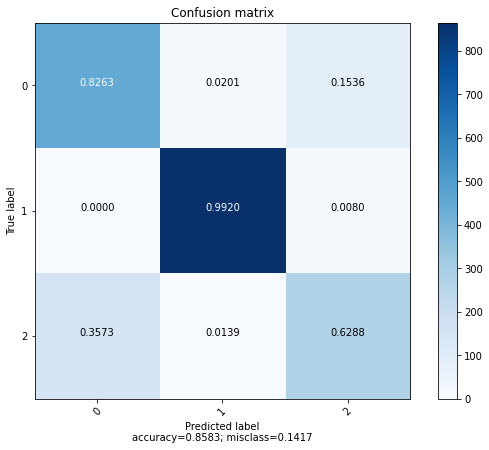

In [23]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['0', '1', '2'])

In [24]:
from sklearn.metrics import fbeta_score

print("Beta Score: {}".format(fbeta_score(y_test, y_pred, beta=1.5, average='micro')))

Beta Score: 0.8583017847485127


<hr>

## Deploy to WML

**WARNING**: the model you deploy to Watson Machine Learning must receive as input for a prediction **ALL of the columns** provided in the dataset, **except the TARGET column**. Any operations with the columns, such as dropping, must be done via pipeline. If the model does not behave as expected, your submission will fail.

With the model running, now we can deploy it to Watson Machine Learning, a service available on the IBM Cloud capable of executing and making machine learning models available through an API in a dedicated environment.

In [58]:
from ibm_watson_machine_learning import APIClient

To access Watson Machine Learning, you need to create an APIKEY. There are two ways to do this: via the IBM Cloud cli or via the IBM Cloud interface.

If you want to create an APIKEY via API first download install the [IBM Cloud CLI](https://cloud.ibm.com/docs/cli). Once installed, run the following commands to obtain the APIKEY

ibmcloud login <br>
ibmcloud iam api-key-create API_KEY_NAME

Through the interface, just click on `Manage` and then on `Access(IAM)` as shown in the image below.

![api-1](https://imgur.com/bS61qef.png "api1")

As soon as the page loads, on the left side there is a menu. Click on API keys to create a new one, as shown in the image below.

![api-2](https://imgur.com/XaOalxq.png "api2")

The image below shows a panel with all its APIs created for the IBM Cloud platform, let's create a new one accessing the WML service by clicking on `Create an IBM Cloud API key`

![api-3](https://imgur.com/0WKTanm.png "api3")

A form will open where you simply name your API and click on `Create`. As soon as you click on the button your API will be created and just copy it, insert in `apikey` in the cell below.

![api-4](https://imgur.com/3wCTLaH.png "api4")

In addition to needing an APIKEY to access Watson Machine Learning, we need to know the URL where it is located, so be aware when creating the service in which region you are instantiating it. Each region has a specific URL and they are listed below.

- Dallas: `https://us-south.ml.cloud.ibm.com`
- London: `https://eu-gb.ml.cloud.ibm.com`
- Frankfurt: `https://eu-de.ml.cloud.ibm.com`
- Tokyo: `https://jp-tok.ml.cloud.ibm.com`

With the WML properly located, just enter the correct URL in the cell below.

In [ ]:
wml_credentials = {
  "apikey": "xxxxxxxxxx",
  "url": "https://us-south.ml.cloud.ibm.com"
}

print(wml_credentials)

In [ ]:
client = APIClient(wml_credentials)

### Preparing the environment that will receive the model

Watson Machine Learning organizes the deployment of models in spaces, so that it is possible to use the organization's WML instance and divide it into small spaces dedicated to hosting the models that each department will build and make available. Therefore, after instantiating the WML, it is necessary to create a space to receive the model that we are going to create. To create a space in WML we need to go back to the Cloud Pak 4 Data home screen and click on `Deployments`, located on the left side, as shown in the image below.

![img-01](https://imgur.com/Fhx5iKO.png "deployment")

As soon as the page loads we are inside the deployment interface that constitutes a direct access to Watson Machine Learning. Now let's click on the `deployment space` button to create a new space, as shown in the image below.

![img-02](https://imgur.com/DRFuLj6.png "space")

Let's create an empty space to receive our model, as shown in the image below.

![img-03](https://imgur.com/uxUf77y.png "creat")

We must fill in some information now. We need to give the space a name, associate an Object Storage and Watson Machine Learning to the space. With the form completed just click on the `Create` button located in the lower right corner.

<!-- ![img-04](https://i.imgur.com/trikImj.png "form") -->


With the space created, we can deploy the created model and proceed with the execution of the cells of this notebbok.

In [ ]:
client.spaces.list(limit=10)

With the spaces listed above, you should find your newly created space and copy the space id in the cell below to be stored in the `space_id` variable.

In [62]:
space_id = '74ced3fb-d4f6-4af8-9ff5-2765c1c66a42'

In [ ]:
client.set.default_space(space_id)

As seen during the creation of the Pipeline, we used a library external to the model creation framework (scikit-learn, tensorflow, keras, etc.) We need to upload our library so that the pipeline can use the methods contained there. For this, the cell below uploads the library so that the model can run correctly.

In [64]:
meta_prop_pkg_extn = {
    client.package_extensions.ConfigurationMetaNames.NAME: "my_custom_sklearn_transforms",
    client.package_extensions.ConfigurationMetaNames.DESCRIPTION: "Pkg extension for custom lib",
    client.package_extensions.ConfigurationMetaNames.TYPE: "pip_zip"
}

pkg_extn_details = client.package_extensions.store(meta_props=meta_prop_pkg_extn, file_path="sklearn_transforms.zip")
pkg_extn_uid = client.package_extensions.get_uid(pkg_extn_details)
pkg_extn_url = client.package_extensions.get_href(pkg_extn_details)

Creating package extensions
SUCCESS


In [65]:
details = client.package_extensions.get_details(pkg_extn_uid)

In [ ]:
client.software_specifications.ConfigurationMetaNames.show()

In [ ]:
client.software_specifications.list()

In [68]:
sofware_spec_uid = client.software_specifications.get_id_by_name("default_py3.7")

With the upload of the library, it must be made available by creating a specific software environment where it is available for use. The cell below creates an environment that does just that.

In [ ]:
meta_prop_sw_spec = {
    client.software_specifications.ConfigurationMetaNames.NAME: "my_custom_sklearn_transforms",
    client.software_specifications.ConfigurationMetaNames.DESCRIPTION: "Software specification for linalgnorm-0.1",
    client.software_specifications.ConfigurationMetaNames.BASE_SOFTWARE_SPECIFICATION: {"guid": sofware_spec_uid}
}

sw_spec_details = client.software_specifications.store(meta_props=meta_prop_sw_spec)
sw_spec_uid = client.software_specifications.get_uid(sw_spec_details)


client.software_specifications.add_package_extension(sw_spec_uid, pkg_extn_uid)

With the environment created, just upload the model created to Watson Machine Learning.

In [70]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'Final',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid
}

published_model = client.repository.store_model(
    model=model,
    meta_props=metadata)

In [ ]:
client.repository.list_models()

In [ ]:
import json
saved_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(saved_model_uid)
print(json.dumps(model_details, indent=2))

With a model stored in WML, it is now necessary to make the model available so that it is available to be accessed via an API call. To make a model available, run the cell below.

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "champion",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(client.repository.get_model_uid(published_model), meta_props=metadata)

## Making a prediction

In [ ]:
deployment_uid = client.deployments.get_uid(created_deployment)

In [ ]:
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

In [ ]:
print(np.array(X.iloc[0].values).tolist())
print(y.iloc[0])

In [ ]:
scoring_payload = {
    "input_data": [{
        'fields': X.columns.to_list(),
        'values': [[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 9.48803557, 0.02775, -0.02775, 170.53875, 0.00216, -0.00216, 146.0, 318.0, -146.0, 0.0, 0.0819, -0.0819, 615.8, 19.5, 0.0, 2.26, 0.0, -0.15, 793.0, 93.59, 29.45, -16.65, 35.8, 1.0, 5455.0, 81.0, -81.0, 4467.0, 64.0, -96.0, 927.0, 105.0, -61.0, 291.93423, 48.141651, 15.347]]}]
}
scoring_payload

In [ ]:
predictions = client.deployments.score(deployment_uid, scoring_payload)

In [ ]:
print(json.dumps(predictions, indent=2))

# Important things you will use next

In the cell below you will find the necessaries credentials you must insert in the submission app you have deployed on Red Hat OpenShift and provide them at the submission.

In [ ]:
print('WML APIKEY: ', wml_credentials['apikey'])
print('URL to make predictions: ', scoring_endpoint)

# References

- [Cloud Pak 4 data docs](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/wml-ai.html)
- [ibm-watson-machine-learning sdk docs](http://ibm-wml-api-pyclient.mybluemix.net)
- [Watson Machine Learning REST API docs](https://cloud.ibm.com/apidocs/machine-learning)
- [Watson Machine Learning tutorials](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-samples-overview.html)